#### Scikit- Learn Classification 

##### Random-Forest Algorithm

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)

In [ ]:
X = [[ 1,  2,  3], [11, 12, 13],[100,200,300]] 
y = ['a', 'b','c']  # classes of each sample

In [ ]:
clf.fit(X, y)


In [ ]:
clf.predict(X)

In [ ]:
clf.predict([ [14, 15, 16],[4, 5, 6]])

In [ ]:
clf.predict([ [140, 150, 160],[40, 50, 60]])

##### Transformers and PreProcessors

In [22]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 4 samples/observations and 2 variables/features
data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print('original data\n',data)
print('scaled data\n',scaled_data)


original data
 [[0 0]
 [1 0]
 [0 1]
 [1 1]]
scaled data
 [[-1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1.  1.]]


#### Pipelines

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# create a pipeline object
pipe = make_pipeline(
       StandardScaler(),
       LogisticRegression(random_state=0)
   )

# load the iris dataset and split it into train and test sets
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# fit the whole pipeline
pipe.fit(X_train, y_train)

 # we can now use it like any other estimator
accuracy_score(pipe.predict(X_test), y_test)



0.8157894736842105

##### Model Evaluation

In [27]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

X, y = make_regression(n_samples=1000, random_state=0)
lr = LinearRegression()

result = cross_validate(lr, X, y)  # defaults to 5-fold CV
result['test_score']  # r_squared score is high because dataset is easy


array([1., 1., 1.])

##### Automatic Parameter Search

In [29]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# define the parameter space that will be searched over
param_distributions = {'n_estimators': randint(1, 5),
                        'max_depth': randint(5, 10)}

# now create a searchCV object and fit it to the data
search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                             n_iter=5,
                             param_distributions=param_distributions,
                             random_state=0)
search.fit(X_train, y_train)


RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0), n_iter=5,
                   param_distributions={'max_depth': ...,
                                        'n_estimators': ...},
                   random_state=0)
search.best_params_


# the search object now acts like a normal random forest estimator
# with max_depth=9 and n_estimators=4
search.score(X_test, y_test)


0.7349601117850644

In [30]:
search.best_params_

{'max_depth': 9, 'n_estimators': 4}

#### Clustering Algorithms examples

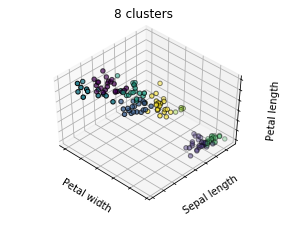

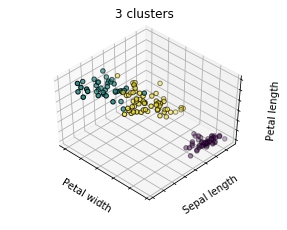

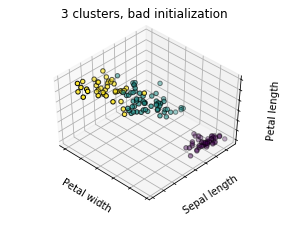

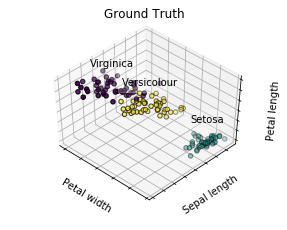

In [32]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()